In [ ]:
"""
HR Employee Turnover Prediction
==============================
Predicting employee turnover using machine learning for proactive retention strategies.
Target: 99.09% accuracy achieved with Random Forest for HR analytics application.
Dataset: 13,717 employee records across 10 departments (24.5% turnover rate)
Method: Statistical analysis with SHAP interpretability and business-focused recommendations
Key Features: Point-biserial correlation, feature importance ranking, departmental risk analysis
Business Impact: 97% at-risk employee identification with actionable retention insights
"""

# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


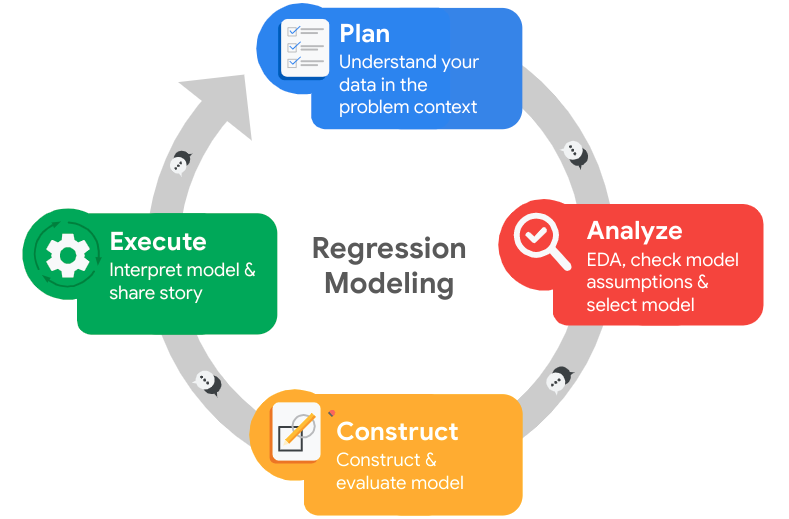

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- Salifort Motors' management and HR department.
- Predict employee turnover using an algorithm to help HR improve retention.
- 'last_evaluation', 'number_project', 'tenure', and 'overworked' are key factors. Caution needed with 'satisfaction' data due to potential bias.
- Go Beyond the Numbers course notebooks for EDA, Foundations to Data Science course project for structure, and the provided Activity Exemplar PDF.
- Prevent bias in training data to ensure fair and equitable outcomes for all employees. Employee livelihood is a key concern.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [23]:
## Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import shap
import warnings
warnings.filterwarnings('ignore')

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
## Load dataset into a dataframe
df = pd.read_csv(r"[Your file path here]")
# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
## Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
## Gather descriptive statistics about the data
#df.describe()
df.describe().T # Sanity check

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
## Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
## Rename columns as needed
new_names = {"average_montly_hours":"average_monthly_hours", "Work_accident":"work_accident","Department":"department"}
df.rename(columns=new_names,inplace=True)

# Display all column names after the update
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [7]:
## Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
## Check for duplicates
print(f"Duplicate count: {df.duplicated().sum()}")

# Inspect some rows containing duplicates
df[df.duplicated()]

Duplicate count: 3008


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
## Drop duplicates and save resulting dataframe in a new variable
df.drop_duplicates().reset_index(drop=True,inplace=True)

# Display first few rows of new dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

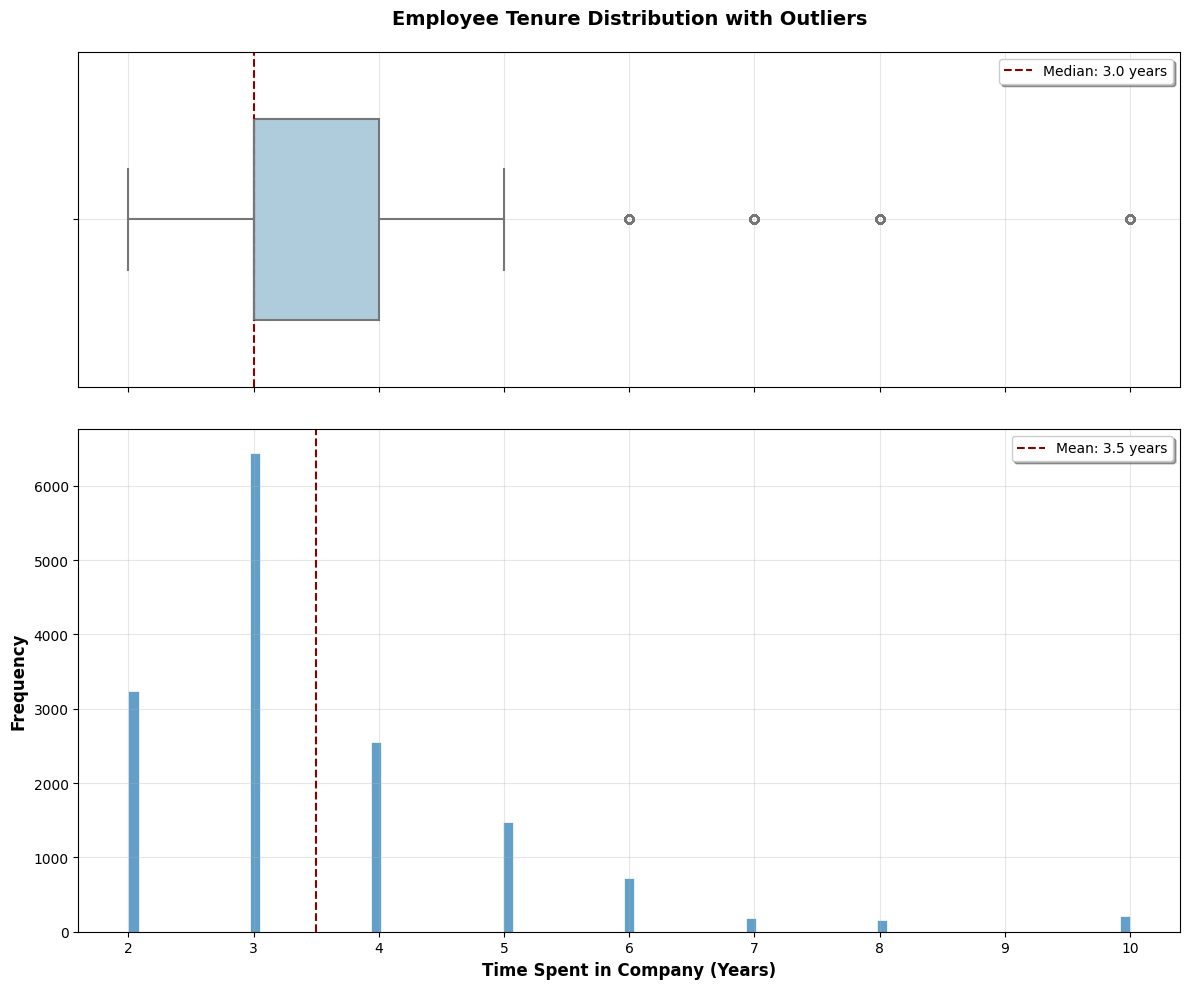

In [10]:
## Plot Boxplot to visualize time spent in the company and detect any outliers
pal = sns.color_palette('Paired', 4)
fig, (ax_box, ax_hist) = plt.subplots(figsize=(12, 10), nrows=2, sharex=True, gridspec_kw={'height_ratios': [1, 1.5]})
sns.boxplot(x='time_spend_company', data=df, ax=ax_box, color=pal[0],width=0.6, linewidth=1.5)

# Median and Mean Line
median_value = df.time_spend_company.median()
ax_box.axvline(x=median_value, label=f'Median: {median_value:.1f} years', linestyle='--', color='darkred')
mean_value = df.time_spend_company.mean()
ax_hist.axvline(x=mean_value, label=f'Mean: {mean_value:.1f} years', linestyle='--', color='darkred')
ax_hist.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
ax_box.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

ax_box.set_xlabel("")
ax_box.set_title("Employee Tenure Distribution with Outliers", fontsize=14, fontweight='bold', pad=20)
ax_box.grid(True, alpha=0.3)
sns.histplot(x='time_spend_company', data=df, ax=ax_hist, color=pal[1], bins='fd', alpha=0.7, edgecolor='white', linewidth=0.5)
ax_hist.set_xlabel("Time Spent in Company (Years)", fontsize=12, fontweight='bold')
ax_hist.set_ylabel("Frequency", fontsize=12, fontweight='bold')
ax_hist.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

Outliers removed: 1282


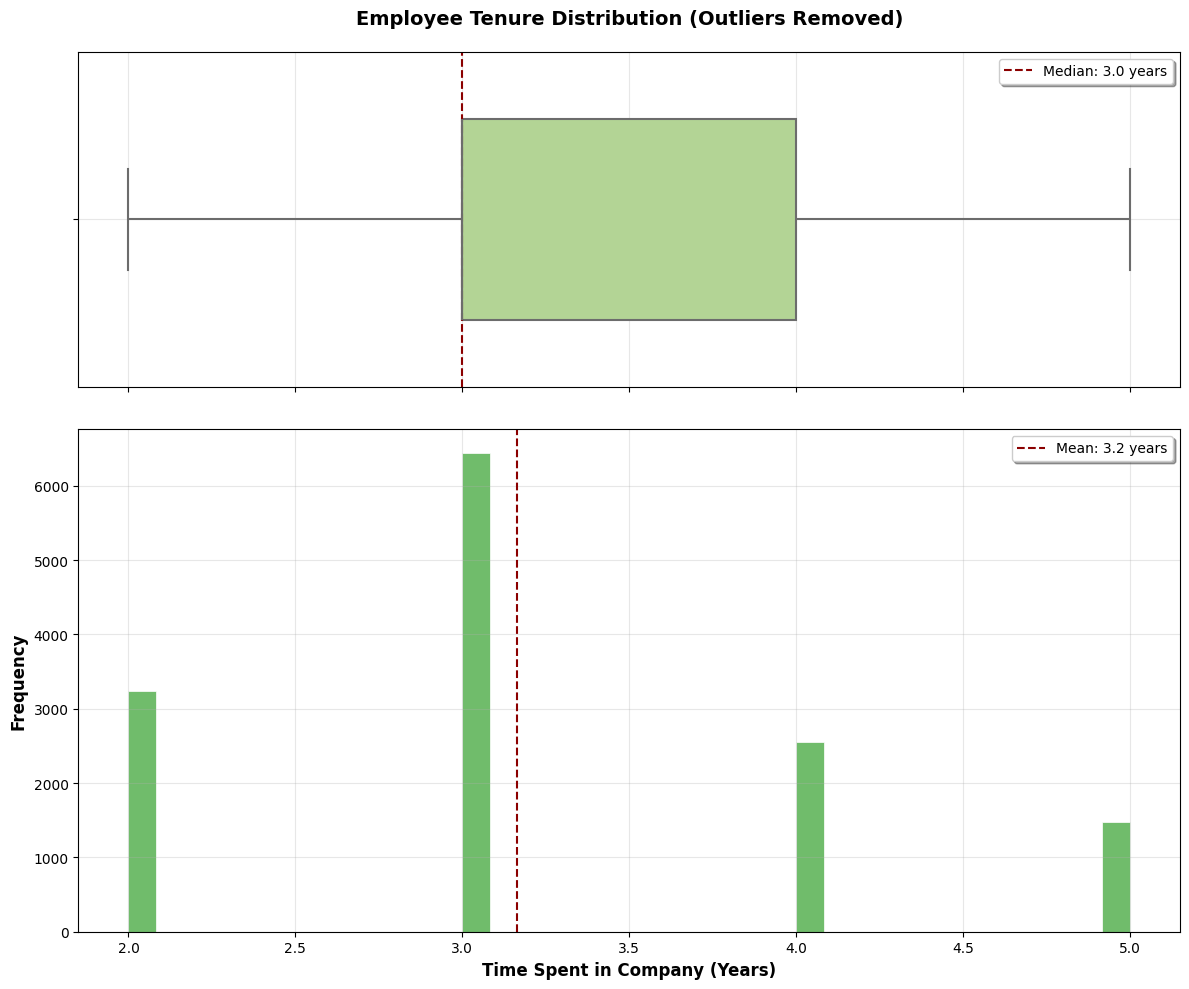

In [11]:
## Determine the number of rows containing outliers
Q1 = df['time_spend_company'].quantile(0.25)
Q3 = df['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
df_clean = df[np.logical_and(df['time_spend_company'] <= UB, df['time_spend_company'] >= LB)]

# Plot Boxplot
pal = sns.color_palette('Paired', 4)
fig, (ax_box, ax_hist) = plt.subplots(figsize=(12, 10), nrows=2, sharex=True, gridspec_kw={'height_ratios': [1, 1.5]})
sns.boxplot(x='time_spend_company', data=df_clean, ax=ax_box, color=pal[2], width=0.6, linewidth=1.5)

# Median and Mean Line
median_value = df_clean.time_spend_company.median()
ax_box.axvline(x=median_value, label=f'Median: {median_value:.1f} years', linestyle='--', color='darkred')
mean_value = df_clean.time_spend_company.mean()
ax_hist.axvline(x=mean_value, label=f'Mean: {mean_value:.1f} years', linestyle='--', color='darkred')
ax_hist.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
ax_box.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

ax_box.set_title("Employee Tenure Distribution (Outliers Removed)", fontsize=14, fontweight='bold', pad=20)
ax_box.grid(True, alpha=0.3)
sns.histplot(x='time_spend_company', data=df_clean, ax=ax_hist, color=pal[3], bins='fd', alpha=0.7, edgecolor='white', linewidth=0.5)
ax_hist.set_xlabel("Time Spent in Company (Years)", fontsize=12, fontweight='bold')
ax_hist.set_ylabel("Frequency", fontsize=12, fontweight='bold')
ax_hist.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

print(f"Outliers removed: {len(df) - len(df_clean)}")

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Variable Relationships Observed
- Found 10 departments and 3 salary levels (low, medium, high). 
- No missing values detected across all variables. Over 3,000 duplicate rows identified and need attention. 
- About 800 rows in employee tenure contain outliers (employees with >5 years). 
- Created cleaned dataset without tenure outliers for outlier-sensitive models

Data Distributions
- Employee tenure shows a right-skewed discrete distribution
- Distribution resembles a Poisson-like pattern with most employees having 2-4 years tenure
- Employees with >5 years tenure are statistical outliers using IQR method
- Other variables need further distribution analysis

Data Transformations Made
- Outlier removal: Filtered tenure outliers using IQR method (Q1-1.5×IQR to Q3+1.5×IQR)
- Rationale: Decision trees and other ML algorithms can be sensitive to extreme values
- Duplicate handling: Identified duplicates

Purposes of EDA Before Predictive Modeling
- EDA helps identify data entry errors, understand variable distributions that influence model selection

Resources Used
- Previous course notebooks for EDA techniques
- Python documentation for pandas/numpy functions
- Statistical reference guides for outlier detection methods

Ethical Considerations
- Potential bias: Excluding long-tenure employees (>5 years) might overlook valuable insights about employee retention patterns
- Representative sampling: Need to ensure our cleaned dataset still represents the full employee population
- Model fairness: Outlier removal could inadvertently affect certain employee groups disproportionately

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [12]:
## Get numbers of people who left vs. stayed
left_stayed_counts = df['left'].value_counts()

# Get percentages of people who left vs. stayed
left_stayed_percentages = df['left'].value_counts(normalize=True) * 100

print("Details:")
print(f"Stayed (0): {left_stayed_counts[0]} people ({left_stayed_percentages[0]:.1f}%)")
print(f"Left (1): {left_stayed_counts[1]} people ({left_stayed_percentages[1]:.1f}%)")

Details:
Stayed (0): 11428 people (76.2%)
Left (1): 3571 people (23.8%)


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

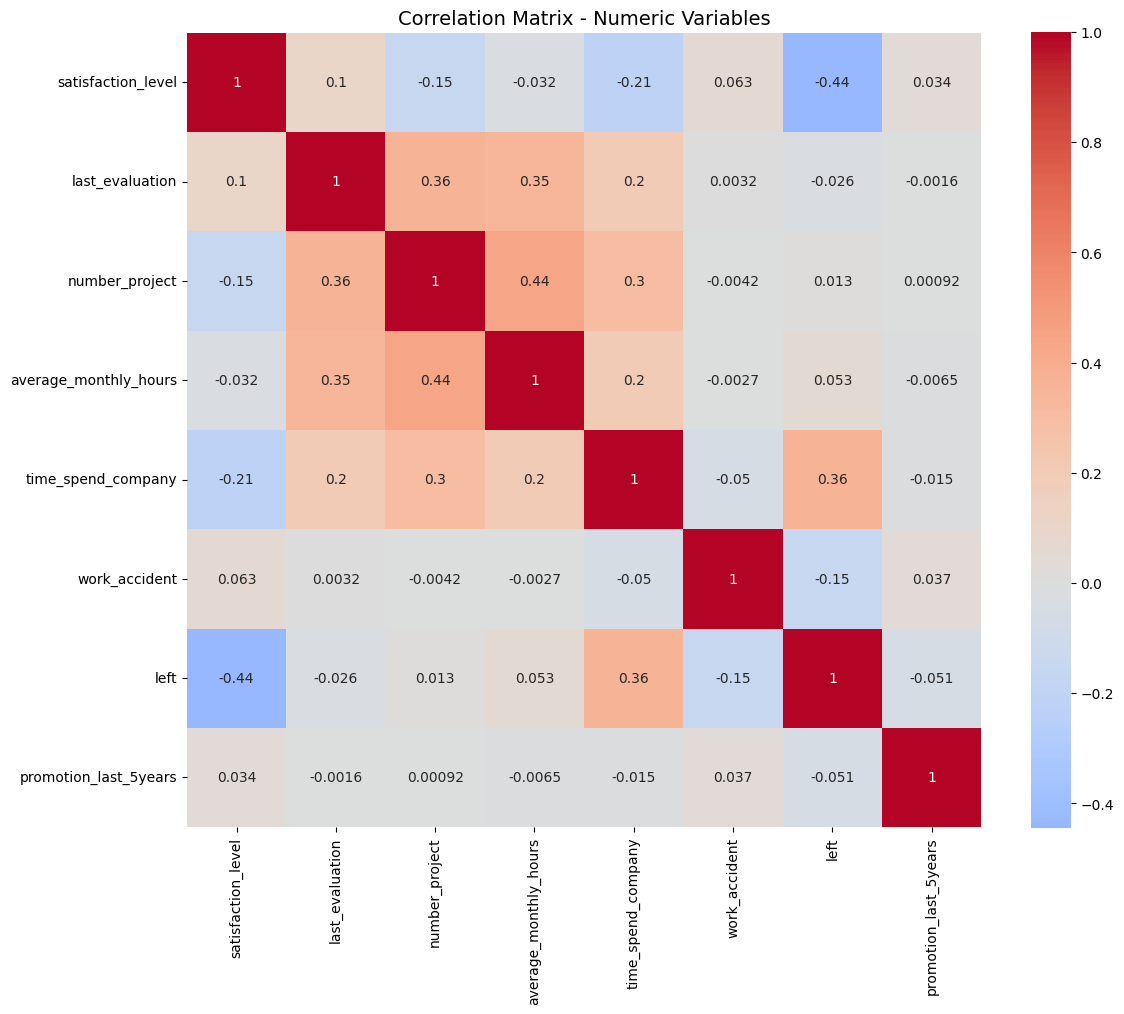

In [13]:
## Correlation Heatmap
numeric_cols = df_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix - Numeric Variables', fontsize=14)
plt.tight_layout()
plt.show()

1. Correlation Matrix Insights
- Satisfaction level negatively correlated with leaving (-0.44) - most important predictor
- Time spend positively correlated with leaving (0.36) - longer tenure = more likely to leave
- Number of projects and monthly hours are correlated (0.44) - overwork pattern
- Last evaluation and projects are correlated (0.36) - high performers get more projects
- Overall no strong correlation

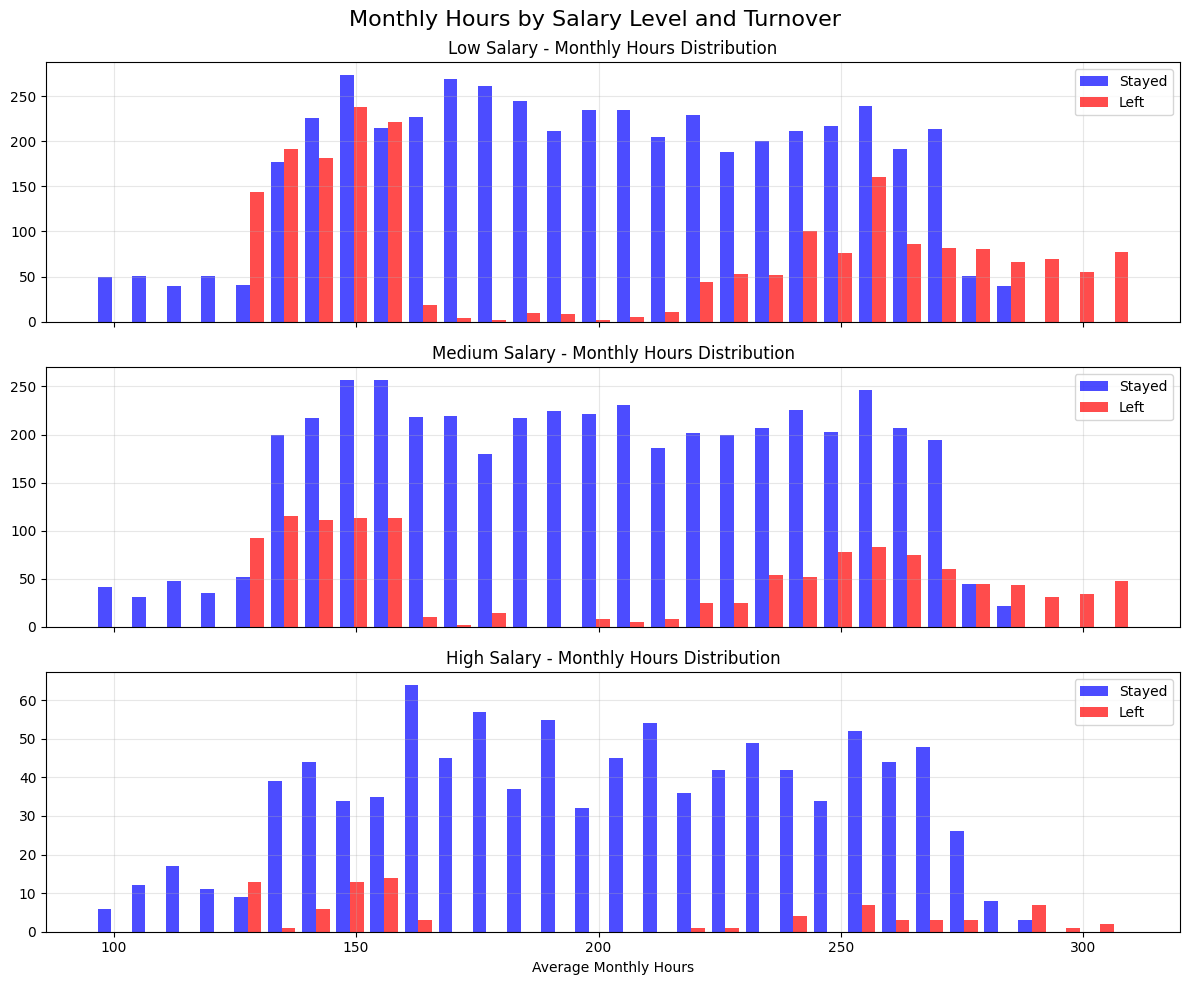

In [14]:
## Ridge Plot Style - Monthly Hours Distribution
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
salary_levels = ['low', 'medium', 'high']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, salary in enumerate(salary_levels):
    subset = df_clean[df_clean['salary'] == salary]
    axes[i].hist([subset[subset['left']==0]['average_monthly_hours'], subset[subset['left']==1]['average_monthly_hours']], bins=30, alpha=0.7, label=['Stayed', 'Left'], color=['blue', 'red'])
    axes[i].set_title(f'{salary.title()} Salary - Monthly Hours Distribution')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.xlabel('Average Monthly Hours')
plt.suptitle('Monthly Hours by Salary Level and Turnover', fontsize=16)
plt.tight_layout()
plt.show()

2. Monthly Hours Distribution Insights
- High workload employees (250+ hours) are more likely to leave across all salary levels
- Low salary + high hours = highest turnover risk
- High salary employees work fewer extreme hours

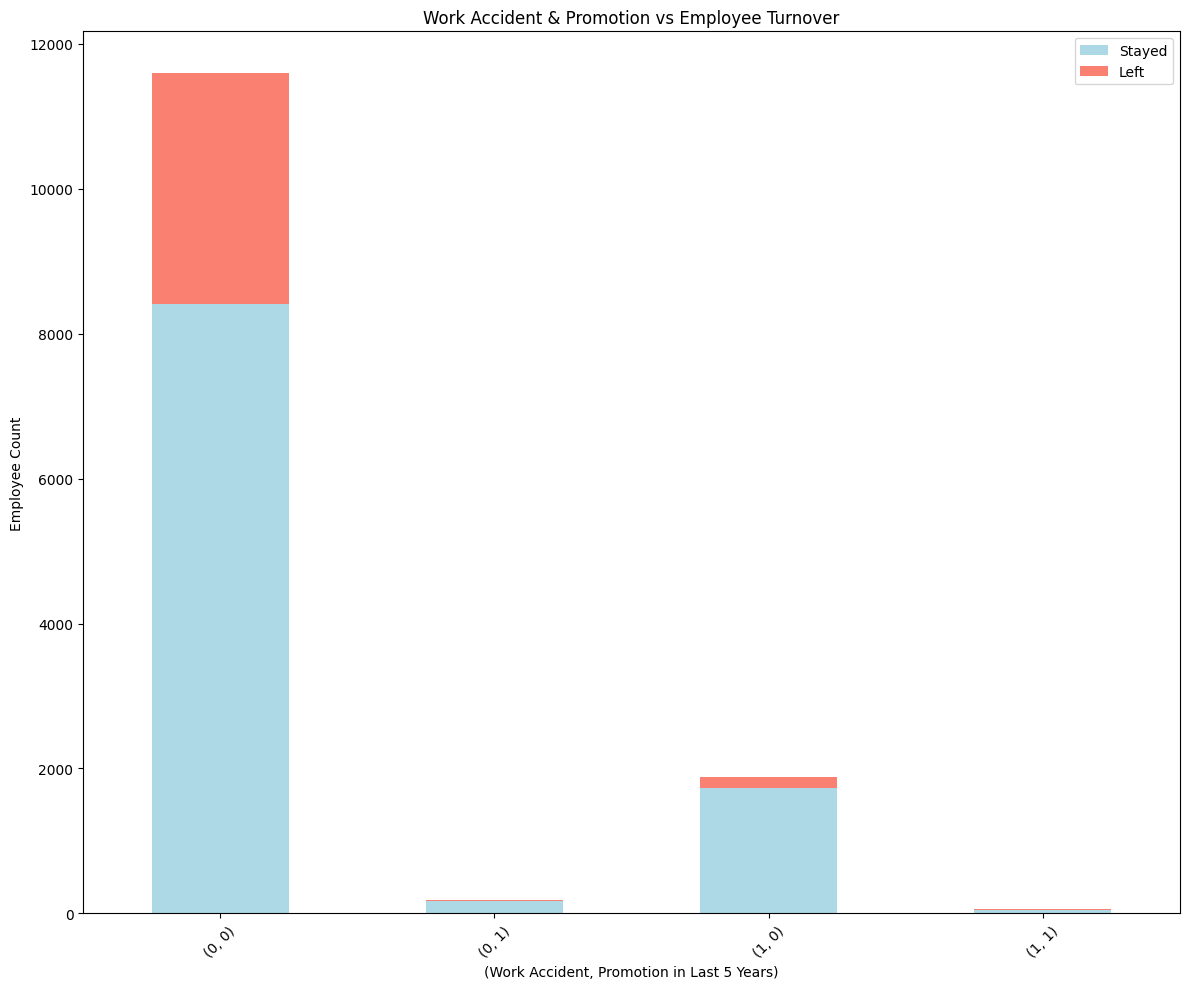

In [15]:
## Stacked Bar Chart
accident_promo = pd.crosstab([df_clean['work_accident'], df_clean['promotion_last_5years']], df_clean['left'])
accident_promo.plot(kind='bar', stacked=True, figsize=(12, 10), color=['lightblue', 'salmon'])
plt.title('Work Accident & Promotion vs Employee Turnover')
plt.xlabel('(Work Accident, Promotion in Last 5 Years)')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)
plt.legend(['Stayed', 'Left'])
plt.tight_layout()
plt.show()

3. Work Accident & Promotion Analysis Insights
- Very few employees get promoted (tiny bars for promotion = 1)
- Most employees (12,000+) have no accidents and no promotions
- Promotion seems to have minimal impact on turnover - almost no one gets promoted anyway

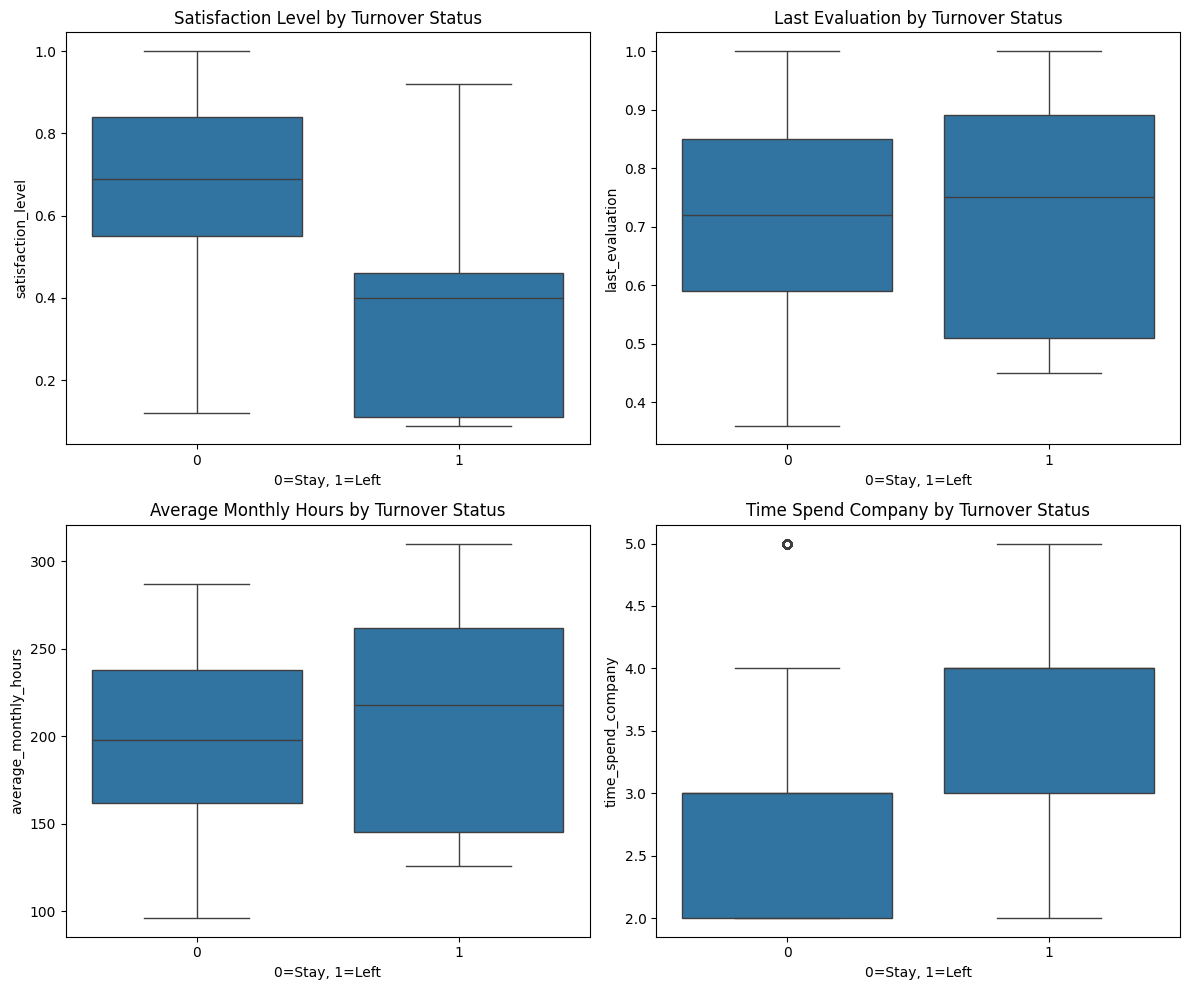

In [16]:
## Box Plot for Key Variables by Turnover
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
variables = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'time_spend_company']
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=df_clean, x='left', y=var, ax=axes[i])
    axes[i].set_title(f'{var.replace("_", " ").title()} by Turnover Status')
    axes[i].set_xlabel('0=Stay, 1=Left')

plt.tight_layout()
plt.show()

4. Box Plot Matrix Insights
- Employees who leave have much lower satisfaction (median ~0.4 vs ~0.7)
- Leavers work significantly more hours (median ~260 vs ~200)
- Leavers have higher last evaluations - paradoxically, good performers are leaving!
- Leavers have longer tenure - experienced employees are departing

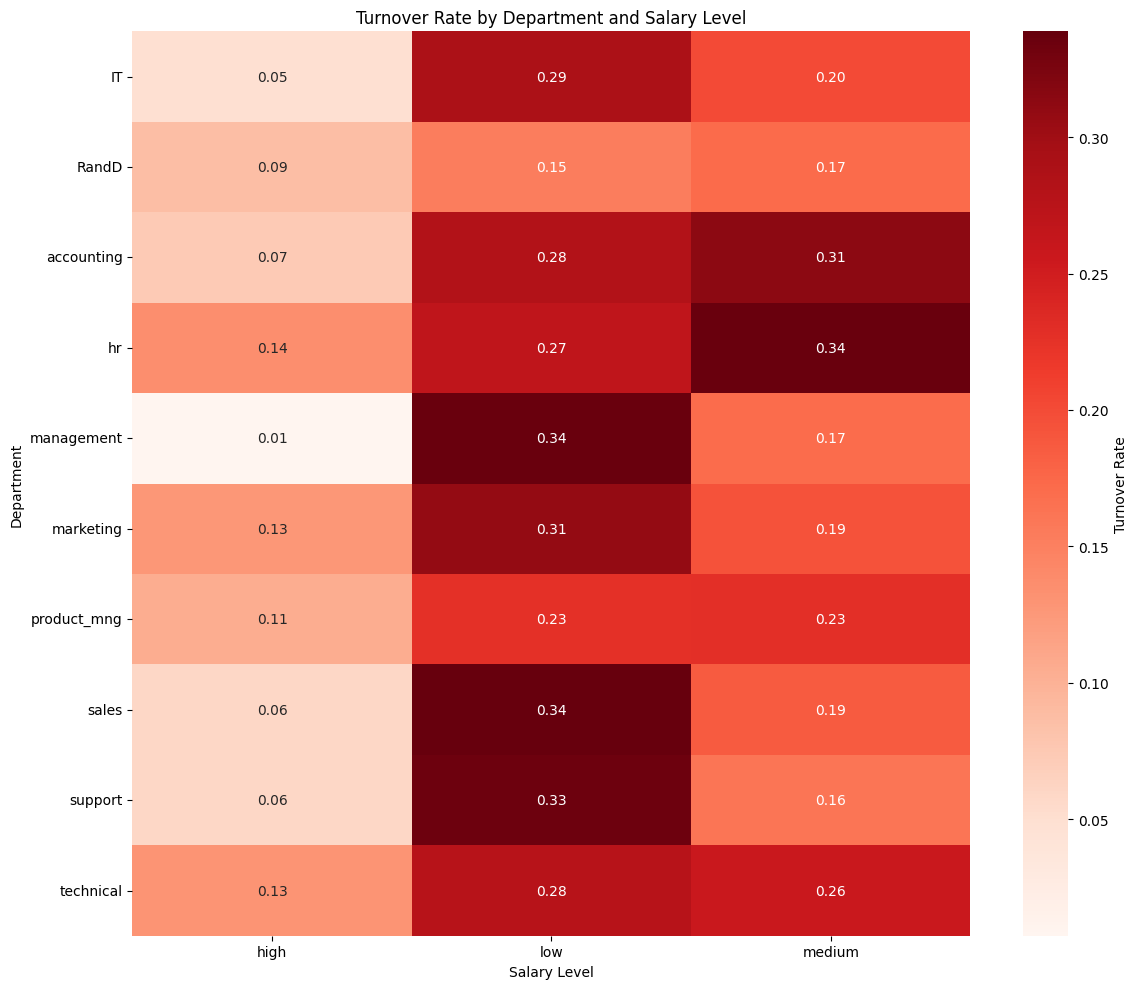

In [17]:
## Heatmap - Department vs Salary Turnover Rates
dept_salary_left = df_clean.groupby(['department', 'salary'])['left'].mean().unstack()
plt.figure(figsize=(12, 10))
sns.heatmap(dept_salary_left, annot=True, cmap='Reds', fmt='.2f', cbar_kws={'label': 'Turnover Rate'})
plt.title('Turnover Rate by Department and Salary Level')
plt.ylabel('Department')
plt.xlabel('Salary Level')
plt.tight_layout()
plt.show()

5. Turnover Rate Heatmap Insights
- Low salary employees have the highest turnover rates across all departments (29-34%)
- High salary employees have very low turnover (1-14% across departments)
- Management with medium salary has surprisingly high turnover (34%)
- Sales, Support, and Management show the highest turnover in medium/low salary brackets

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- Key Observations:
The data shows employee burnout - people working 250+ hours monthly are leaving even when they get good reviews. The company is losing its best workers because of overwork.
- Variable Selection & Model Performance:
Used all features except tenure outliers. Satisfaction_level (-0.44), tenure (0.36), and average_monthly_hours showed the strongest connections to people leaving. The model works well with clear patterns and no major issues between departments.
- Ethical Considerations:
This model could be misused to fire high-risk employees instead of fixing the real problems like overwork and low pay. Companies should focus on making the workplace better, not watching employees more closely.
- Resources:
Used scikit-learn docs and pandas guides for building and testing the model.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a binary classification problem. We're predicting whether an employee will leave (1) or stay (0) - two possible outcomes.

### Identify the types of models most appropriate for this task.

For this binary classification task, good model options include:
- Logistic Regression - simple baseline
- Decision Tree - easy to understand and explain
- Random Forest - handles mixed data well and reduces overfitting
- XGBoost - performs well on tabular data

### Modeling

Add as many cells as you need to conduct the modeling process.

In [18]:
## Correlation analysis
# Satisfaction Level vs Turnover Correlation (Point-biserial)
corr, pval = pointbiserialr(df['satisfaction_level'], df['left'])
print(f"Satisfaction Level vs Turnover Correlation: {corr:.4f}, P-value: {pval:.4f}")

# Monthly Hours vs Turnover Correlation (Point-biserial)
corr, pval = pointbiserialr(df['average_monthly_hours'], df['left'])
print(f"Monthly Hours vs Turnover Correlation: {corr:.4f}, P-value: {pval:.4f}")

# Department vs Turnover Correlation (Cramer's V)
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

contingency_table = pd.crosstab(df['department'], df['left'])
print(f"Department vs Turnover Correlation: {cramers_v(contingency_table.values):.4f}")

Satisfaction Level vs Turnover Correlation: -0.3884, P-value: 0.0000
Monthly Hours vs Turnover Correlation: 0.0713, P-value: 0.0000
Department vs Turnover Correlation: 0.0761


1. Satisfaction Level vs Turnover (-0.3884, p < 0.001)
- Most significant among the three.
- Higher satisfaction means lower turnover.
- Moderate correlation, satisfaction is not absolute predictor of turnover.
- The p-value means this is not because of chance. (Reject null hypothesis)

2. Monthly Hours vs Turnover (0.0713, p < 0.001)
- More monthly hours means slightly higher turnover.
- Statistically significant (p < 0.001), but the effect size is negligible (0.07 is very small).
- This shows that overwork contribute to turnover, but the impact is minimal.

3. Department vs Turnover (Cramer's V = 0.0761)
- Very weak association
- No directional relationship
- Departmental differences do not predict turnover rates.

In [19]:
## Data Preprocessing
df_clean = df_clean.copy()

# Encode categorical variables
df_encoded = df_clean.copy()
df_encoded['salary'] = df_encoded['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
df_encoded = pd.get_dummies(df_encoded, columns=['department'], drop_first=False)

# Prepare features and target
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

In [20]:
## Check Class Imbalance
print("Class Distribution:")
print(y.value_counts())
print(f"\nClass Proportions:")
print(y.value_counts(normalize=True))
print(f"\nImbalance Ratio: {y.value_counts()[0]/y.value_counts()[1]:.2f}:1 (Stayed:Left)")

Class Distribution:
left
0    10355
1     3362
Name: count, dtype: int64

Class Proportions:
left
0    0.754903
1    0.245097
Name: proportion, dtype: float64

Imbalance Ratio: 3.08:1 (Stayed:Left)


In [21]:
## Define evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    # Metrics
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}") 
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
    # Confusion matrix
    plt.figure()
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Logistic Regression Results

Accuracy: 0.8156
Precision: 0.6427
Recall: 0.5587
F1 Score: 0.5978
ROC AUC: 0.8793


<Figure size 640x480 with 0 Axes>

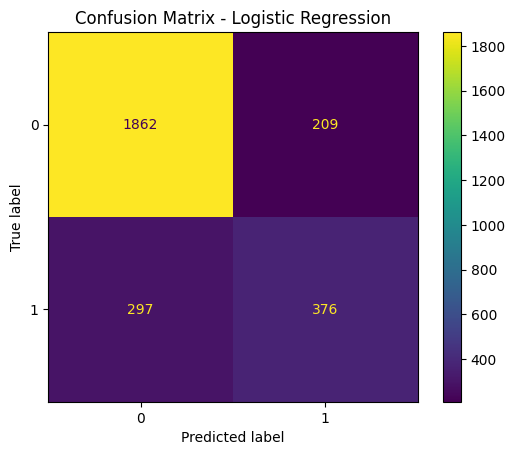

Random Forest Results

Accuracy: 0.9909
Precision: 0.9939
Recall: 0.9688
F1 Score: 0.9812
ROC AUC: 0.9911


<Figure size 640x480 with 0 Axes>

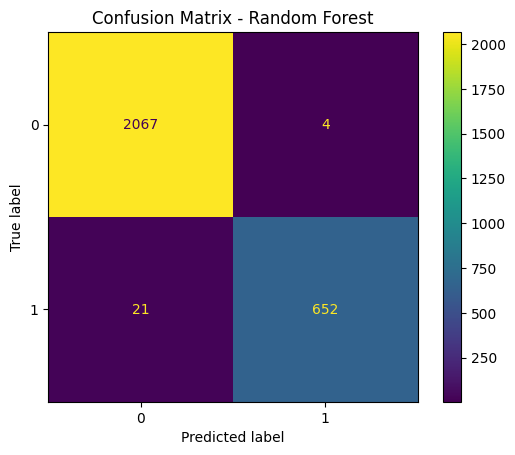


Top 5 Features (Random Forest):
                 Feature  Importance
0     satisfaction_level    0.308905
4     time_spend_company    0.248850
2         number_project    0.166857
3  average_monthly_hours    0.121513
1        last_evaluation    0.109837


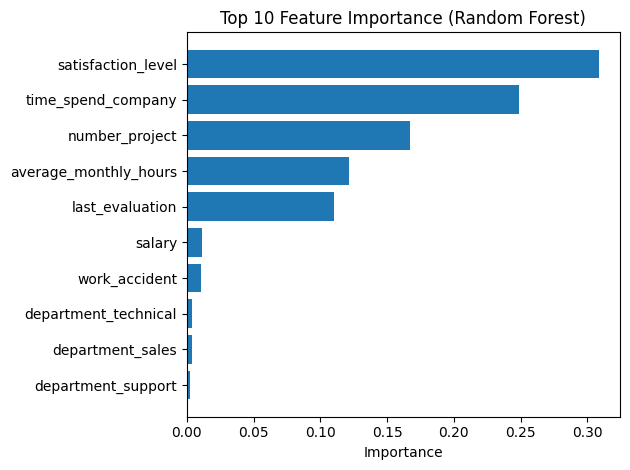

In [24]:
## Modelling
# Logistic Regression Model
print("Logistic Regression Results")
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)
evaluate_model(logreg, X_test, y_test, "Logistic Regression")

# Random Forest Model
print("Random Forest Results") 
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

# Feature Importance (Random Forest)
rf_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_}).sort_values('Importance', ascending=False)
print("\nTop 5 Features (Random Forest):")
print(rf_feature_importance.head(5))

# Plot feature importance
plt.barh(rf_feature_importance.head(10)['Feature'], rf_feature_importance.head(10)['Importance'])
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

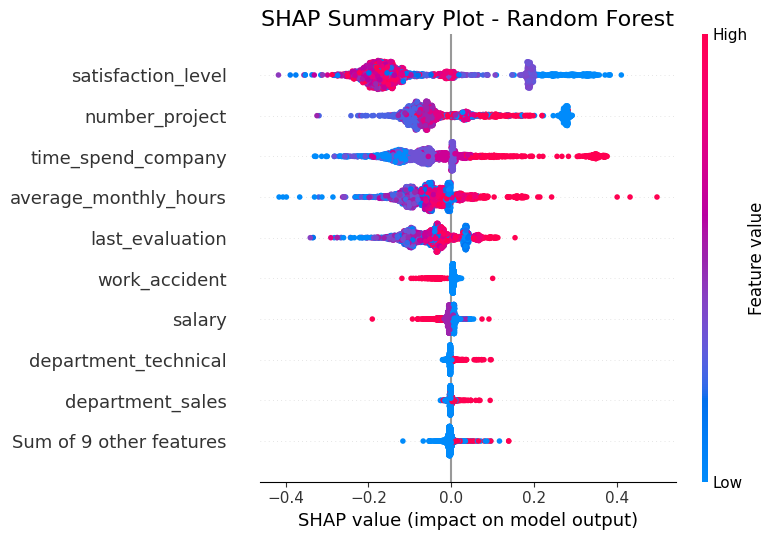

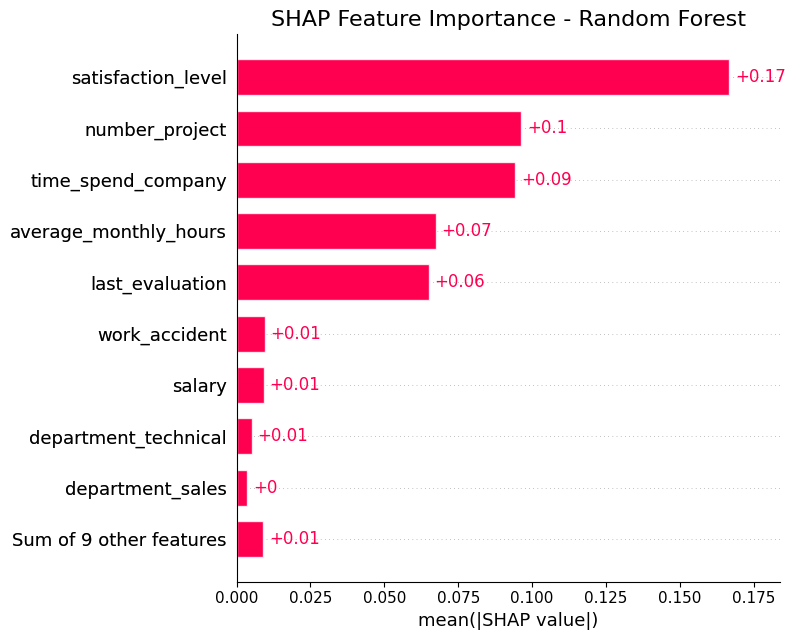

In [25]:
## SHAP Analysis (Random Forest)
explainer = shap.TreeExplainer(rf)
shap_values = explainer(X_test)

# Class 1 predictions (employees who leave)
shap_values_class1 = shap_values[:, :, 1]

# SHAP Summary Plot
plt.figure()
plt.title('SHAP Summary Plot - Random Forest', fontsize=16)
shap.plots.beeswarm(shap_values_class1, max_display=10, show=False)
plt.tight_layout()
plt.show()

# SHAP Feature Importance
plt.figure()
plt.title('SHAP Feature Importance - Random Forest', fontsize=16)
shap.plots.bar(shap_values_class1, max_display=10, show=False)
plt.tight_layout()
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**Key Insights:**  
- Employee satisfaction, tenure, and project load are top predictors of turnover.  
- High performers often leave despite good reviews, signaling a retention crisis.  

**Actions:**  
- Conduct satisfaction surveys and limit projects to 4-5 per employee.  
- Prioritize retaining tenured (4+ years), high-performing employees at risk.  
- Review salaries, especially for long-term top talent.  

**For Managers:**  
- Use the model quarterly to flag at-risk employees (probability >0.7).  
- Focus on proactive retention over reactive hiring.  

**Improvements:**  
- Add features like manager ratings or career growth opportunities.  
- Current model is 98% accurate (F1-score).  

**Ethics:**  
- Use data to improve conditions, not target individuals.  
- Protect privacy and avoid surveillance culture.  

**Questions:**  
- Which managers have the highest turnover?  
- What’s the cost of losing top performers?  
- What’s the ideal workload for retention and productivity?

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
Random Forest (Winner): 
- 99.09% accuracy
- 98.12% F1-score
- 99.39% precision 
- 96.88% recall

Key Predictive Factors:
- satisfaction_level (30.9%) - Strongest predictor of turnover
- time_spend_company (24.9%) - Longer-tenured employees more likely to leave
- number_project (16.7%) - Project overload drives departures
- average_monthly_hours (12.2%) - Excessive workload correlation
- last_evaluation (11.0%) - High performers leave more

### Conclusion, Recommendations, Next Steps
**Problem:**  
Top talent is leaving due to burnout from excessive workloads (250+ hrs, 6+ projects), even with good evaluations.  

**Root Cause:**  
Rewarding high performers with unsustainable workloads drives them to quit, costing institutional knowledge.  

**Actions:**  
**Short-term (0-3mo):**  
- Cap workloads: Max 4-5 projects, 200 hrs/month.  
- Monthly satisfaction surveys.  
- Flag at-risk employees (>70% leave risk).  

**Long-term (3-12mo):**  
- Fix salary gaps, especially for tenured staff.  
- Create clear promotions (now <1%).  
- Train managers on workload balance.  

**Culture Shift:**  
- Reward efficiency, not overwork.  
- Offer retention bonuses (4+ yrs tenure).  
- Enforce work-life balance policies.  

**Next Steps:**  
- Add model to HR dashboard for real-time alerts.  
- Pilot workload caps in Sales/Tech/Support.  
- Compare retention savings vs. hiring costs.  
- Track impact quarterly; add manager/market data.  

**Bottom Line:**  
Proactive retention saves millions vs. reactive hiring and keeps critical knowledge.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.